In [155]:
#importing libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [156]:
dataset = pd.read_csv('/content/drive/MyDrive/Crime hotspot_project/Crimes_2001_to_2022 _v1.csv',low_memory=False)
 
dataset.head(10)

# dataset.dtypes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738.0,HY411648,9/5/2015 13:30,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015.0,2/10/2018 15:50,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739.0,HY411615,9/4/2015 11:30,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,6,1138875.0,1904869.0,2015.0,2/10/2018 15:50,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166.0,JC213529,9/1/2018 0:01,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,6,NaN,NaN,2018.0,4/6/2019 16:04,NaN,NaN,NaN
3,10224740.0,HY411595,9/5/2015 12:45,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015.0,2/10/2018 15:50,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741.0,HY411610,9/5/2015 13:00,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015.0,2/10/2018 15:50,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742.0,HY411435,9/5/2015 10:55,082XX S LOOMIS BLVD,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,5,1168430.0,1850165.0,2015.0,2/10/2018 15:50,41.744379,-87.658431,"(41.744378879, -87.658430635)"
6,10224743.0,HY411629,9/4/2015 18:00,021XX W CHURCHILL ST,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,...,32.0,24.0,5,1161628.0,1912157.0,2015.0,2/10/2018 15:50,41.914636,-87.681631,"(41.914635603, -87.681630909)"
7,10224744.0,HY411605,9/5/2015 13:00,025XX W CERMAK RD,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,25.0,31.0,6,1159734.0,1889313.0,2015.0,9/17/2015 11:37,41.851989,-87.689219,"(41.851988885, -87.689219118)"
8,10224745.0,HY411654,9/5/2015 11:30,031XX W WASHINGTON BLVD,320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,True,...,27.0,27.0,3,1155536.0,1900515.0,2015.0,2/10/2018 15:50,41.882814,-87.704326,"(41.88281374, -87.704325717)"
9,11645836.0,JC212333,5/1/2016 0:25,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016.0,4/6/2019 16:04,NaN,NaN,NaN


In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    23000 non-null  float64
 1   Case Number           23000 non-null  object 
 2   Date                  23000 non-null  object 
 3   Block                 23000 non-null  object 
 4   IUCR                  23000 non-null  object 
 5   Primary Type          23000 non-null  object 
 6   Description           23000 non-null  object 
 7   Location Description  22917 non-null  object 
 8   Arrest                23000 non-null  object 
 9   Domestic              23000 non-null  object 
 10  Beat                  23000 non-null  float64
 11  District              23000 non-null  float64
 12  Ward                  22996 non-null  float64
 13  Community Area        22996 non-null  float64
 14  FBI Code              23000 non-null  object 
 15  X Coordinate       

In [159]:
dataset.shape

(25000, 22)

In [160]:
# droping the features that are not usefull
dataset=dataset.drop(columns=['ID','Case Number','Description','Updated On','Block'])
# X.shape

print('Columns in dataset: ', dataset.columns)


dataset.shape


Columns in dataset:  Index(['Date', 'IUCR', 'Primary Type', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


(25000, 17)

In [161]:
# droping the null value enteries drop null 
dataset.dropna(inplace=True)
dataset

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924.0,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015.0,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511.0,15.0,29.0,25.0,6,1138875.0,1904869.0,2015.0,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,9/5/2015 12:45,2023,NARCOTICS,SIDEWALK,True,False,1412.0,14.0,35.0,21.0,18,1152037.0,1920384.0,2015.0,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522.0,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015.0,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,9/5/2015 10:55,610,BURGLARY,RESIDENCE,False,False,614.0,6.0,21.0,71.0,5,1168430.0,1850165.0,2015.0,41.744379,-87.658431,"(41.744378879, -87.658430635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22995,10/4/2015 21:19,502P,OTHER OFFENSE,STREET,False,False,722.0,7.0,6.0,68.0,26,1173716.0,1860663.0,2015.0,41.773071,-87.638752,"(41.773071271, -87.638751579)"
22996,10/4/2015 20:30,890,THEFT,RESTAURANT,False,False,114.0,1.0,42.0,32.0,6,1177276.0,1901405.0,2015.0,41.884791,-87.624469,"(41.884790951, -87.624469241)"
22997,10/4/2015 4:14,820,THEFT,RESTAURANT,False,False,1712.0,17.0,39.0,14.0,6,1150689.0,1931638.0,2015.0,41.968314,-87.721308,"(41.968314078, -87.721308478)"
22998,10/4/2015 19:14,460,BATTERY,APARTMENT,True,True,1713.0,17.0,33.0,14.0,08B,1154216.0,1930513.0,2015.0,41.965157,-87.708370,"(41.96515714, -87.708370003)"


In [162]:
# Before removing Null values 1048575

# After removing Null value 1015247

# Total Null values removed 33328

In [163]:
# ignore latitude and logitude outside of the chicago
dataset=dataset[(dataset["Latitude"] < 45)
             & (dataset["Latitude"] > 40)
             & (dataset["Longitude"] < -85)
             & (dataset["Longitude"] > -90)]
dataset

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924.0,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015.0,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511.0,15.0,29.0,25.0,6,1138875.0,1904869.0,2015.0,41.895080,-87.765400,"(41.895080471, -87.765400451)"
3,9/5/2015 12:45,2023,NARCOTICS,SIDEWALK,True,False,1412.0,14.0,35.0,21.0,18,1152037.0,1920384.0,2015.0,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,9/5/2015 13:00,560,ASSAULT,APARTMENT,False,True,1522.0,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015.0,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,9/5/2015 10:55,610,BURGLARY,RESIDENCE,False,False,614.0,6.0,21.0,71.0,5,1168430.0,1850165.0,2015.0,41.744379,-87.658431,"(41.744378879, -87.658430635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22995,10/4/2015 21:19,502P,OTHER OFFENSE,STREET,False,False,722.0,7.0,6.0,68.0,26,1173716.0,1860663.0,2015.0,41.773071,-87.638752,"(41.773071271, -87.638751579)"
22996,10/4/2015 20:30,890,THEFT,RESTAURANT,False,False,114.0,1.0,42.0,32.0,6,1177276.0,1901405.0,2015.0,41.884791,-87.624469,"(41.884790951, -87.624469241)"
22997,10/4/2015 4:14,820,THEFT,RESTAURANT,False,False,1712.0,17.0,39.0,14.0,6,1150689.0,1931638.0,2015.0,41.968314,-87.721308,"(41.968314078, -87.721308478)"
22998,10/4/2015 19:14,460,BATTERY,APARTMENT,True,True,1713.0,17.0,33.0,14.0,08B,1154216.0,1930513.0,2015.0,41.965157,-87.708370,"(41.96515714, -87.708370003)"


In [164]:
# # listing the crimes category wise with their counts
types=dataset['Primary Type'].value_counts().sort_values(ascending=False)
types

THEFT                                4947
BATTERY                              4150
CRIMINAL DAMAGE                      2455
NARCOTICS                            1785
ASSAULT                              1458
OTHER OFFENSE                        1404
DECEPTIVE PRACTICE                   1303
BURGLARY                             1167
ROBBERY                               906
MOTOR VEHICLE THEFT                   846
CRIMINAL TRESPASS                     493
WEAPONS VIOLATION                     315
PUBLIC PEACE VIOLATION                212
OFFENSE INVOLVING CHILDREN            164
INTERFERENCE WITH PUBLIC OFFICER      112
CRIM SEXUAL ASSAULT                   111
SEX OFFENSE                            75
PROSTITUTION                           60
ARSON                                  35
GAMBLING                               31
LIQUOR LAW VIOLATION                   26
KIDNAPPING                             17
STALKING                               15
INTIMIDATION                      

In [165]:
# crime types according to their counts in dataframe
# 15 classes
# major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT','OTHER OFFENSE','DECEPTIVE PRACTICE','NARCOTICS','BURGLARY','MOTOR VEHICLE THEFT'
#               ,'ROBBERY','CRIMINAL TRESPASS','WEAPONS VIOLATION','OFFENSE INVOLVING CHILDREN','PUBLIC PEACE VIOLATION','CRIM SEXUAL ASSAULT']
# 8 classes
# storing major crime types according to their counts in dataframe
# major_crimes=['THEFT','BATTERY','CRIMINAL DAMAGE','ASSAULT','OTHER OFFENSE','DECEPTIVE PRACTICE','NARCOTICS','BURGLARY']

In [166]:
# major crime time
#---> Storing Major Crimes
major_crimes=['THEFT','BATTERY']

In [167]:
crime_df = dataset.loc[dataset['Primary Type'] .isin(major_crimes)]
crime_df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924.0,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015.0,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511.0,15.0,29.0,25.0,6,1138875.0,1904869.0,2015.0,41.895080,-87.765400,"(41.895080471, -87.765400451)"
7,9/5/2015 13:00,860,THEFT,GROCERY FOOD STORE,True,False,1034.0,10.0,25.0,31.0,6,1159734.0,1889313.0,2015.0,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,9/5/2015 14:00,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833.0,8.0,13.0,65.0,6,1150938.0,1857056.0,2015.0,41.763648,-87.722345,"(41.763647552, -87.722344693)"
11,9/5/2015 11:00,460,BATTERY,SMALL RETAIL STORE,False,False,1623.0,16.0,45.0,11.0,08B,1137969.0,1934340.0,2015.0,41.975968,-87.768014,"(41.975968415, -87.768014257)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22990,10/4/2015 22:40,498,BATTERY,RESIDENCE,False,True,725.0,7.0,17.0,67.0,04B,1168039.0,1859657.0,2015.0,41.770435,-87.659591,"(41.770434611, -87.659590924)"
22996,10/4/2015 20:30,890,THEFT,RESTAURANT,False,False,114.0,1.0,42.0,32.0,6,1177276.0,1901405.0,2015.0,41.884791,-87.624469,"(41.884790951, -87.624469241)"
22997,10/4/2015 4:14,820,THEFT,RESTAURANT,False,False,1712.0,17.0,39.0,14.0,6,1150689.0,1931638.0,2015.0,41.968314,-87.721308,"(41.968314078, -87.721308478)"
22998,10/4/2015 19:14,460,BATTERY,APARTMENT,True,True,1713.0,17.0,33.0,14.0,08B,1154216.0,1930513.0,2015.0,41.965157,-87.708370,"(41.96515714, -87.708370003)"


In [168]:
#data = crime_df.pivot_table(index='Year', columns='Primary Type', aggfunc='count')
#print(data)

# since we dont have different crimes in early years so we drop data of these years

In [169]:
# selecting the dataset which starts from 2015
crime_df=crime_df[crime_df['Year']>=2015]
crime_df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924.0,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015.0,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511.0,15.0,29.0,25.0,6,1138875.0,1904869.0,2015.0,41.895080,-87.765400,"(41.895080471, -87.765400451)"
7,9/5/2015 13:00,860,THEFT,GROCERY FOOD STORE,True,False,1034.0,10.0,25.0,31.0,6,1159734.0,1889313.0,2015.0,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,9/5/2015 14:00,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833.0,8.0,13.0,65.0,6,1150938.0,1857056.0,2015.0,41.763648,-87.722345,"(41.763647552, -87.722344693)"
11,9/5/2015 11:00,460,BATTERY,SMALL RETAIL STORE,False,False,1623.0,16.0,45.0,11.0,08B,1137969.0,1934340.0,2015.0,41.975968,-87.768014,"(41.975968415, -87.768014257)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22990,10/4/2015 22:40,498,BATTERY,RESIDENCE,False,True,725.0,7.0,17.0,67.0,04B,1168039.0,1859657.0,2015.0,41.770435,-87.659591,"(41.770434611, -87.659590924)"
22996,10/4/2015 20:30,890,THEFT,RESTAURANT,False,False,114.0,1.0,42.0,32.0,6,1177276.0,1901405.0,2015.0,41.884791,-87.624469,"(41.884790951, -87.624469241)"
22997,10/4/2015 4:14,820,THEFT,RESTAURANT,False,False,1712.0,17.0,39.0,14.0,6,1150689.0,1931638.0,2015.0,41.968314,-87.721308,"(41.968314078, -87.721308478)"
22998,10/4/2015 19:14,460,BATTERY,APARTMENT,True,True,1713.0,17.0,33.0,14.0,08B,1154216.0,1930513.0,2015.0,41.965157,-87.708370,"(41.96515714, -87.708370003)"


In [170]:
temp=crime_df.copy()
temp

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/5/2015 13:30,486,BATTERY,RESIDENCE,False,True,924.0,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015.0,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,9/4/2015 11:30,870,THEFT,CTA BUS,False,False,1511.0,15.0,29.0,25.0,6,1138875.0,1904869.0,2015.0,41.895080,-87.765400,"(41.895080471, -87.765400451)"
7,9/5/2015 13:00,860,THEFT,GROCERY FOOD STORE,True,False,1034.0,10.0,25.0,31.0,6,1159734.0,1889313.0,2015.0,41.851989,-87.689219,"(41.851988885, -87.689219118)"
10,9/5/2015 14:00,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,833.0,8.0,13.0,65.0,6,1150938.0,1857056.0,2015.0,41.763648,-87.722345,"(41.763647552, -87.722344693)"
11,9/5/2015 11:00,460,BATTERY,SMALL RETAIL STORE,False,False,1623.0,16.0,45.0,11.0,08B,1137969.0,1934340.0,2015.0,41.975968,-87.768014,"(41.975968415, -87.768014257)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22990,10/4/2015 22:40,498,BATTERY,RESIDENCE,False,True,725.0,7.0,17.0,67.0,04B,1168039.0,1859657.0,2015.0,41.770435,-87.659591,"(41.770434611, -87.659590924)"
22996,10/4/2015 20:30,890,THEFT,RESTAURANT,False,False,114.0,1.0,42.0,32.0,6,1177276.0,1901405.0,2015.0,41.884791,-87.624469,"(41.884790951, -87.624469241)"
22997,10/4/2015 4:14,820,THEFT,RESTAURANT,False,False,1712.0,17.0,39.0,14.0,6,1150689.0,1931638.0,2015.0,41.968314,-87.721308,"(41.968314078, -87.721308478)"
22998,10/4/2015 19:14,460,BATTERY,APARTMENT,True,True,1713.0,17.0,33.0,14.0,08B,1154216.0,1930513.0,2015.0,41.965157,-87.708370,"(41.96515714, -87.708370003)"


In [171]:
# getting the half of our data set for random data selection
nrows= temp.shape[0]
portion=math.floor(nrows/3)
portion

3027

In [172]:
first=temp.iloc[0:portion,:]
first.shape

(3027, 17)

In [173]:
nextp=portion+portion+1
scnd=temp.iloc[(portion+1):nextp,:]
scnd.shape

(3027, 17)

In [174]:
finalp=nextp+portion+1
third=temp.iloc[(nextp+1):finalp,:]
third.shape


(3025, 17)

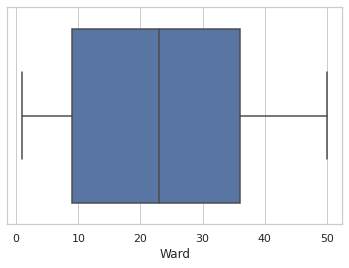

In [175]:
# picking random 5k enteries from the first part
index=np.random.choice(portion,replace=False,size = 2000)
df_frst=first.iloc[index]
df_frst.shape
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=df_frst["Ward"])

In [176]:
# picking random 5k enteries from the second half

index=np.random.choice(portion,replace=False,size = 2000)
df_scnd=scnd.iloc[index]
df_scnd


,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
10833,9/19/2015 5:30,460,BATTERY,STREET,False,False,331.0,3.0,5.0,43.0,08B,1190997.0,1858323.0,2015.0,41.766250,-87.575480,"(41.766249677, -87.57548019)"
8647,9/16/2015 11:30,860,THEFT,DRUG STORE,False,False,1233.0,12.0,2.0,28.0,6,1168413.0,1894846.0,2015.0,41.866989,-87.657205,"(41.866988841, -87.657205006)"
10372,9/18/2015 13:33,860,THEFT,DEPARTMENT STORE,True,False,124.0,1.0,2.0,28.0,6,1173303.0,1895451.0,2015.0,41.868542,-87.639235,"(41.868541914, -87.639235361)"
9832,6/17/2015 9:00,820,THEFT,NURSING HOME/RETIREMENT HOME,False,False,2212.0,22.0,19.0,75.0,6,1163013.0,1828741.0,2015.0,41.685703,-87.678876,"(41.685702753, -87.678875923)"
12493,9/21/2015 9:07,820,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,False,1221.0,12.0,26.0,24.0,6,1158785.0,1904099.0,2015.0,41.892583,-87.692297,"(41.892582592, -87.692296927)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14942,9/23/2015 9:15,820,THEFT,APARTMENT,False,False,613.0,6.0,21.0,71.0,6,1168873.0,1850391.0,2015.0,41.744990,-87.656801,"(41.744989508, -87.65680092)"
10970,9/19/2015 1:52,820,THEFT,STREET,False,False,1213.0,12.0,1.0,24.0,6,1166262.0,1907673.0,2015.0,41.902233,-87.664735,"(41.902233329, -87.664734696)"
13605,9/18/2015 7:00,820,THEFT,STREET,False,False,433.0,4.0,10.0,55.0,6,1199765.0,1817102.0,2015.0,41.652919,-87.544727,"(41.652919193, -87.544726734)"
11330,9/14/2015 16:15,460,BATTERY,ALLEY,False,False,123.0,1.0,2.0,32.0,08B,1176487.0,1896527.0,2015.0,41.871423,-87.627514,"(41.871423284, -87.627513844)"


In [177]:
# picking random 5k enteries from the third half

index=np.random.choice(portion,replace=False,size = 500)
df_third=third.iloc[index]
df_third

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
17915,9/27/2015 17:20,870,THEFT,CTA PLATFORM,False,False,123.0,1.0,2.0,32.0,6,1176517.0,1895340.0,2015.0,41.868165,-87.627440,"(41.868165405, -87.62743954)"
22012,10/3/2015 0:01,820,THEFT,OTHER,False,False,922.0,9.0,12.0,58.0,6,1160219.0,1874090.0,2015.0,41.810205,-87.687859,"(41.81020523, -87.687858849)"
17182,9/26/2015 19:50,486,BATTERY,STREET,False,True,513.0,5.0,9.0,49.0,08B,1178855.0,1832369.0,2015.0,41.695314,-87.620772,"(41.695313622, -87.620772103)"
17457,9/26/2015 9:00,820,THEFT,VEHICLE NON-COMMERCIAL,False,False,1424.0,14.0,1.0,24.0,6,1162515.0,1909832.0,2015.0,41.908237,-87.678437,"(41.908237096, -87.678437417)"
17469,9/25/2015 17:00,810,THEFT,ALLEY,False,False,1922.0,19.0,47.0,6.0,6,1165820.0,1926354.0,2015.0,41.953504,-87.665824,"(41.953504489, -87.665824034)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22142,10/3/2015 14:00,820,THEFT,STREET,False,False,1424.0,14.0,1.0,24.0,6,1162642.0,1909430.0,2015.0,41.907131,-87.677982,"(41.907131317, -87.677982167)"
20602,9/21/2015 8:00,890,THEFT,RESIDENCE,False,False,711.0,7.0,16.0,68.0,6,1173022.0,1863775.0,2015.0,41.781626,-87.641204,"(41.781626308, -87.641203786)"
18965,9/28/2015 20:00,820,THEFT,STREET,False,False,1614.0,16.0,41.0,10.0,6,1122305.0,1934090.0,2015.0,41.975552,-87.825624,"(41.975551593, -87.825623535)"
22781,10/2/2015 14:45,810,THEFT,OTHER,False,False,123.0,1.0,2.0,32.0,6,1176487.0,1896508.0,2015.0,41.871371,-87.627514,"(41.871371147, -87.627514417)"


In [178]:
# combined all three dataframe

temp_df = pd.concat([df_frst,df_scnd],ignore_index=True)
final_df = pd.concat([temp_df,df_third],ignore_index=True)
final_df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/7/2015 17:00,820,THEFT,STREET,False,False,235.0,2.0,5.0,41.0,6,1185606.0,1868621.0,2015.0,41.794637,-87.594916,"(41.794636912, -87.594915739)"
1,9/7/2015 19:00,810,THEFT,STREET,False,False,1034.0,10.0,12.0,30.0,6,1158126.0,1886449.0,2015.0,41.844163,-87.695199,"(41.844162699, -87.695199039)"
2,9/9/2015 19:50,486,BATTERY,STREET,True,True,421.0,4.0,7.0,43.0,08B,1194852.0,1854718.0,2015.0,41.756263,-87.561469,"(41.756263218, -87.561469065)"
3,9/10/2015 2:35,486,BATTERY,APARTMENT,True,True,1125.0,11.0,2.0,27.0,08B,1158652.0,1899913.0,2015.0,41.881099,-87.692900,"(41.881098554, -87.692900119)"
4,9/10/2015 22:00,890,THEFT,POLICE FACILITY/VEH PARKING LOT,False,False,1414.0,14.0,35.0,22.0,6,1157345.0,1914452.0,2015.0,41.921021,-87.697304,"(41.921021491, -87.69730355)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,10/3/2015 14:00,820,THEFT,STREET,False,False,1424.0,14.0,1.0,24.0,6,1162642.0,1909430.0,2015.0,41.907131,-87.677982,"(41.907131317, -87.677982167)"
4496,9/21/2015 8:00,890,THEFT,RESIDENCE,False,False,711.0,7.0,16.0,68.0,6,1173022.0,1863775.0,2015.0,41.781626,-87.641204,"(41.781626308, -87.641203786)"
4497,9/28/2015 20:00,820,THEFT,STREET,False,False,1614.0,16.0,41.0,10.0,6,1122305.0,1934090.0,2015.0,41.975552,-87.825624,"(41.975551593, -87.825623535)"
4498,10/2/2015 14:45,810,THEFT,OTHER,False,False,123.0,1.0,2.0,32.0,6,1176487.0,1896508.0,2015.0,41.871371,-87.627514,"(41.871371147, -87.627514417)"


In [179]:
df=final_df.copy()

In [180]:
# Using PCA to combine two features

from sklearn.decomposition import PCA

location = df[['Latitude','Longitude']]
pca = PCA(n_components=1,random_state=123)
locat = pca.fit_transform(location)
df['Location'] = locat
df

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,9/7/2015 17:00,820,THEFT,STREET,False,False,235.0,2.0,5.0,41.0,6,1185606.0,1868621.0,2015.0,41.794637,-87.594916,0.080947
1,9/7/2015 19:00,810,THEFT,STREET,False,False,1034.0,10.0,12.0,30.0,6,1158126.0,1886449.0,2015.0,41.844163,-87.695199,-0.007871
2,9/9/2015 19:50,486,BATTERY,STREET,True,True,421.0,4.0,7.0,43.0,08B,1194852.0,1854718.0,2015.0,41.756263,-87.561469,0.130165
3,9/10/2015 2:35,486,BATTERY,APARTMENT,True,True,1125.0,11.0,2.0,27.0,08B,1158652.0,1899913.0,2015.0,41.881099,-87.692900,-0.039969
4,9/10/2015 22:00,890,THEFT,POLICE FACILITY/VEH PARKING LOT,False,False,1414.0,14.0,35.0,22.0,6,1157345.0,1914452.0,2015.0,41.921021,-87.697304,-0.077713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,10/3/2015 14:00,820,THEFT,STREET,False,False,1424.0,14.0,1.0,24.0,6,1162642.0,1909430.0,2015.0,41.907131,-87.677982,-0.056702
4496,9/21/2015 8:00,890,THEFT,RESIDENCE,False,False,711.0,7.0,16.0,68.0,6,1173022.0,1863775.0,2015.0,41.781626,-87.641204,0.072112
4497,9/28/2015 20:00,820,THEFT,STREET,False,False,1614.0,16.0,41.0,10.0,6,1122305.0,1934090.0,2015.0,41.975552,-87.825624,-0.183434
4498,10/2/2015 14:45,810,THEFT,OTHER,False,False,123.0,1.0,2.0,32.0,6,1176487.0,1896508.0,2015.0,41.871371,-87.627514,-0.002289


In [181]:
# convertung date column to actual date format
df.Date=pd.to_datetime(df.Date)

df.head(10)

,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,2015-09-07 17:00:00,820,THEFT,STREET,False,False,235.0,2.0,5.0,41.0,6,1185606.0,1868621.0,2015.0,41.794637,-87.594916,0.080947
1,2015-09-07 19:00:00,810,THEFT,STREET,False,False,1034.0,10.0,12.0,30.0,6,1158126.0,1886449.0,2015.0,41.844163,-87.695199,-0.007871
2,2015-09-09 19:50:00,486,BATTERY,STREET,True,True,421.0,4.0,7.0,43.0,08B,1194852.0,1854718.0,2015.0,41.756263,-87.561469,0.130165
3,2015-09-10 02:35:00,486,BATTERY,APARTMENT,True,True,1125.0,11.0,2.0,27.0,08B,1158652.0,1899913.0,2015.0,41.881099,-87.692900,-0.039969
4,2015-09-10 22:00:00,890,THEFT,POLICE FACILITY/VEH PARKING LOT,False,False,1414.0,14.0,35.0,22.0,6,1157345.0,1914452.0,2015.0,41.921021,-87.697304,-0.077713
5,2015-09-07 18:45:00,486,BATTERY,APARTMENT,False,True,2411.0,24.0,50.0,2.0,08B,1158374.0,1948540.0,2015.0,42.014540,-87.692586,-0.159470
6,2015-09-10 13:00:00,810,THEFT,SIDEWALK,False,False,1935.0,19.0,43.0,7.0,6,1170325.0,1916371.0,2015.0,41.926013,-87.649556,-0.061042
7,2015-09-10 08:00:00,890,THEFT,OTHER,False,False,1633.0,16.0,38.0,15.0,6,1138754.0,1926048.0,2015.0,41.953200,-87.765330,-0.136691
8,2015-09-08 20:00:00,486,BATTERY,RESIDENCE PORCH/HALLWAY,False,True,1713.0,17.0,33.0,14.0,08B,1155055.0,1931065.0,2015.0,41.966655,-87.705270,-0.122155
9,2015-09-10 15:20:00,810,THEFT,CONSTRUCTION SITE,False,False,1532.0,15.0,28.0,25.0,6,1143453.0,1902561.0,2015.0,41.888663,-87.748644,-0.071438


In [182]:
# extracting month and weekday from date column
df['month']=df.Date.dt.month
df['weekday'] = df.Date.dt.day_of_week
df=df.drop(columns='Date')
df

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday
0,820,THEFT,STREET,False,False,235.0,2.0,5.0,41.0,6,1185606.0,1868621.0,2015.0,41.794637,-87.594916,0.080947,9,0
1,810,THEFT,STREET,False,False,1034.0,10.0,12.0,30.0,6,1158126.0,1886449.0,2015.0,41.844163,-87.695199,-0.007871,9,0
2,486,BATTERY,STREET,True,True,421.0,4.0,7.0,43.0,08B,1194852.0,1854718.0,2015.0,41.756263,-87.561469,0.130165,9,2
3,486,BATTERY,APARTMENT,True,True,1125.0,11.0,2.0,27.0,08B,1158652.0,1899913.0,2015.0,41.881099,-87.692900,-0.039969,9,3
4,890,THEFT,POLICE FACILITY/VEH PARKING LOT,False,False,1414.0,14.0,35.0,22.0,6,1157345.0,1914452.0,2015.0,41.921021,-87.697304,-0.077713,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,820,THEFT,STREET,False,False,1424.0,14.0,1.0,24.0,6,1162642.0,1909430.0,2015.0,41.907131,-87.677982,-0.056702,10,5
4496,890,THEFT,RESIDENCE,False,False,711.0,7.0,16.0,68.0,6,1173022.0,1863775.0,2015.0,41.781626,-87.641204,0.072112,9,0
4497,820,THEFT,STREET,False,False,1614.0,16.0,41.0,10.0,6,1122305.0,1934090.0,2015.0,41.975552,-87.825624,-0.183434,9,0
4498,810,THEFT,OTHER,False,False,123.0,1.0,2.0,32.0,6,1176487.0,1896508.0,2015.0,41.871371,-87.627514,-0.002289,10,4


In [183]:
# elif t == 'OTHER OFFENSE': return '5'
    # elif t == 'DECEPTIVE PRACTICE': return '6'
    # elif t == 'NARCOTICS': return '7'
    # elif t == 'BURGLARY': return '8'
    # elif t == 'MOTOR VEHICLE THEFT': return '9'
    # elif t == 'ROBBERY': return '10'
    # elif t == 'CRIMINAL TRESPASS': return '11'
    # elif t == 'WEAPONS VIOLATION': return '12'
    # elif t == 'OFFENSE INVOLVING CHILDREN': return '13'
    # elif t == 'PUBLIC PEACE VIOLATION': return '14'
    # elif t == 'CRIM SEXUAL ASSAULT': return '15'

In [184]:
df['Primary Type'].value_counts()

THEFT      2439
BATTERY    2061
Name: Primary Type, dtype: int64

In [185]:
# assigning crimetype 
def crime_type(t):
    if t =='THEFT': return '0'
    else: return '1'

cp_crime = df.copy()
cp_crime['crimeType'] = cp_crime['Primary Type'].map(crime_type)
cp_crime

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday,crimeType
0,820,THEFT,STREET,False,False,235.0,2.0,5.0,41.0,6,1185606.0,1868621.0,2015.0,41.794637,-87.594916,0.080947,9,0,0
1,810,THEFT,STREET,False,False,1034.0,10.0,12.0,30.0,6,1158126.0,1886449.0,2015.0,41.844163,-87.695199,-0.007871,9,0,0
2,486,BATTERY,STREET,True,True,421.0,4.0,7.0,43.0,08B,1194852.0,1854718.0,2015.0,41.756263,-87.561469,0.130165,9,2,1
3,486,BATTERY,APARTMENT,True,True,1125.0,11.0,2.0,27.0,08B,1158652.0,1899913.0,2015.0,41.881099,-87.692900,-0.039969,9,3,1
4,890,THEFT,POLICE FACILITY/VEH PARKING LOT,False,False,1414.0,14.0,35.0,22.0,6,1157345.0,1914452.0,2015.0,41.921021,-87.697304,-0.077713,9,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,820,THEFT,STREET,False,False,1424.0,14.0,1.0,24.0,6,1162642.0,1909430.0,2015.0,41.907131,-87.677982,-0.056702,10,5,0
4496,890,THEFT,RESIDENCE,False,False,711.0,7.0,16.0,68.0,6,1173022.0,1863775.0,2015.0,41.781626,-87.641204,0.072112,9,0,0
4497,820,THEFT,STREET,False,False,1614.0,16.0,41.0,10.0,6,1122305.0,1934090.0,2015.0,41.975552,-87.825624,-0.183434,9,0,0
4498,810,THEFT,OTHER,False,False,123.0,1.0,2.0,32.0,6,1176487.0,1896508.0,2015.0,41.871371,-87.627514,-0.002289,10,4,0


In [186]:
labelEncoder = LabelEncoder()

locDes_enc = labelEncoder.fit_transform(cp_crime['Location Description'])
cp_crime['Location Description'] = locDes_enc

cp_crime.head()

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday,crimeType
0,820,THEFT,75,False,False,235.0,2.0,5.0,41.0,6,1185606.0,1868621.0,2015.0,41.794637,-87.594916,0.080947,9,0,0
1,810,THEFT,75,False,False,1034.0,10.0,12.0,30.0,6,1158126.0,1886449.0,2015.0,41.844163,-87.695199,-0.007871,9,0,0
2,486,BATTERY,75,True,True,421.0,4.0,7.0,43.0,08B,1194852.0,1854718.0,2015.0,41.756263,-87.561469,0.130165,9,2,1
3,486,BATTERY,15,True,True,1125.0,11.0,2.0,27.0,08B,1158652.0,1899913.0,2015.0,41.881099,-87.692900,-0.039969,9,3,1
4,890,THEFT,62,False,False,1414.0,14.0,35.0,22.0,6,1157345.0,1914452.0,2015.0,41.921021,-87.697304,-0.077713,9,3,0


In [187]:
labelEncoder2 = LabelEncoder()

arrest_enc = labelEncoder2.fit_transform(cp_crime['Arrest'])
cp_crime['Arrest'] = arrest_enc

cp_crime.head()

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday,crimeType
0,820,THEFT,75,0,False,235.0,2.0,5.0,41.0,6,1185606.0,1868621.0,2015.0,41.794637,-87.594916,0.080947,9,0,0
1,810,THEFT,75,0,False,1034.0,10.0,12.0,30.0,6,1158126.0,1886449.0,2015.0,41.844163,-87.695199,-0.007871,9,0,0
2,486,BATTERY,75,1,True,421.0,4.0,7.0,43.0,08B,1194852.0,1854718.0,2015.0,41.756263,-87.561469,0.130165,9,2,1
3,486,BATTERY,15,1,True,1125.0,11.0,2.0,27.0,08B,1158652.0,1899913.0,2015.0,41.881099,-87.692900,-0.039969,9,3,1
4,890,THEFT,62,0,False,1414.0,14.0,35.0,22.0,6,1157345.0,1914452.0,2015.0,41.921021,-87.697304,-0.077713,9,3,0


In [188]:
labelEncoder3 = LabelEncoder()

domestic_enc = labelEncoder3.fit_transform(cp_crime['Domestic'])
cp_crime['Domestic'] = domestic_enc

cp_crime.head()

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday,crimeType
0,820,THEFT,75,0,0,235.0,2.0,5.0,41.0,6,1185606.0,1868621.0,2015.0,41.794637,-87.594916,0.080947,9,0,0
1,810,THEFT,75,0,0,1034.0,10.0,12.0,30.0,6,1158126.0,1886449.0,2015.0,41.844163,-87.695199,-0.007871,9,0,0
2,486,BATTERY,75,1,1,421.0,4.0,7.0,43.0,08B,1194852.0,1854718.0,2015.0,41.756263,-87.561469,0.130165,9,2,1
3,486,BATTERY,15,1,1,1125.0,11.0,2.0,27.0,08B,1158652.0,1899913.0,2015.0,41.881099,-87.692900,-0.039969,9,3,1
4,890,THEFT,62,0,0,1414.0,14.0,35.0,22.0,6,1157345.0,1914452.0,2015.0,41.921021,-87.697304,-0.077713,9,3,0


In [189]:
labelEncoder5 = LabelEncoder()

Year_enc = labelEncoder5.fit_transform(cp_crime['Year'])
cp_crime['Year'] = Year_enc

cp_crime.head()

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday,crimeType
0,820,THEFT,75,0,0,235.0,2.0,5.0,41.0,6,1185606.0,1868621.0,0,41.794637,-87.594916,0.080947,9,0,0
1,810,THEFT,75,0,0,1034.0,10.0,12.0,30.0,6,1158126.0,1886449.0,0,41.844163,-87.695199,-0.007871,9,0,0
2,486,BATTERY,75,1,1,421.0,4.0,7.0,43.0,08B,1194852.0,1854718.0,0,41.756263,-87.561469,0.130165,9,2,1
3,486,BATTERY,15,1,1,1125.0,11.0,2.0,27.0,08B,1158652.0,1899913.0,0,41.881099,-87.692900,-0.039969,9,3,1
4,890,THEFT,62,0,0,1414.0,14.0,35.0,22.0,6,1157345.0,1914452.0,0,41.921021,-87.697304,-0.077713,9,3,0


In [190]:
cp_crime['Year'].value_counts()

0    4409
1      83
2       8
Name: Year, dtype: int64

In [191]:
# feature scaling
scaler = preprocessing.MinMaxScaler()
cp_crime[['Beat']] = scaler.fit_transform(cp_crime[['Beat']])
cp_crime[['X Coordinate', 'Y Coordinate']] = scaler.fit_transform(cp_crime[['X Coordinate', 'Y Coordinate']])
cp_crime

,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday,crimeType
0,820,THEFT,75,0,0,0.051155,2.0,5.0,41.0,6,0.814395,0.392357,0,41.794637,-87.594916,0.080947,9,0,0
1,810,THEFT,75,0,0,0.380776,10.0,12.0,30.0,6,0.552835,0.523079,0,41.844163,-87.695199,-0.007871,9,0,0
2,486,BATTERY,75,1,1,0.127888,4.0,7.0,43.0,08B,0.902400,0.290414,0,41.756263,-87.561469,0.130165,9,2,1
3,486,BATTERY,15,1,1,0.418317,11.0,2.0,27.0,08B,0.557842,0.621802,0,41.881099,-87.692900,-0.039969,9,3,1
4,890,THEFT,62,0,0,0.537541,14.0,35.0,22.0,6,0.545402,0.728408,0,41.921021,-87.697304,-0.077713,9,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,820,THEFT,75,0,0,0.541667,14.0,1.0,24.0,6,0.595820,0.691585,0,41.907131,-87.677982,-0.056702,10,5,0
4496,890,THEFT,63,0,0,0.247525,7.0,16.0,68.0,6,0.694618,0.356824,0,41.781626,-87.641204,0.072112,9,0,0
4497,820,THEFT,75,0,0,0.620050,16.0,41.0,10.0,6,0.211884,0.872402,0,41.975552,-87.825624,-0.183434,9,0,0
4498,810,THEFT,56,0,0,0.004950,1.0,2.0,32.0,6,0.727599,0.596835,0,41.871371,-87.627514,-0.002289,10,4,0


In [192]:
# using correlation for the feature selection
corelation = cp_crime.corr()
corelation


,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,month,weekday
Location Description,1.000000,-0.102963,-0.255771,0.008354,0.008789,-0.006403,-0.018277,0.006280,-0.023851,-0.009596,-0.023800,0.006024,0.021352,-0.019066,-0.017314
Arrest,-0.102963,1.000000,0.061631,-0.022787,-0.022799,0.013668,0.018690,0.021259,-0.011057,-0.018455,-0.011118,0.021271,0.015078,0.017762,-0.014424
Domestic,-0.255771,0.061631,1.000000,-0.038819,-0.038625,-0.089596,0.115298,-0.038063,-0.128464,0.010194,-0.128060,-0.040456,0.094738,0.042784,0.025066
Beat,0.008354,-0.022787,-0.038819,1.000000,0.999928,0.657699,-0.501336,-0.553799,0.635383,0.000335,0.636233,-0.548441,-0.677921,0.003047,-0.001099
District,0.008789,-0.022799,-0.038625,0.999928,1.000000,0.659337,-0.502028,-0.554518,0.636644,0.000183,0.637494,-0.549146,-0.679159,0.003268,-0.001264
Ward,-0.006403,0.013668,-0.089596,0.657699,0.659337,1.000000,-0.531686,-0.415943,0.645244,-0.002321,0.645526,-0.409300,-0.647131,-0.007219,-0.005533
Community Area,-0.018277,0.018690,0.115298,-0.501336,-0.502028,-0.531686,1.000000,0.237934,-0.774196,-0.000659,-0.773524,0.227943,0.702855,-0.015957,-0.004478
X Coordinate,0.006280,0.021259,-0.038063,-0.553799,-0.554518,-0.415943,0.237934,1.000000,-0.531630,0.004195,-0.534378,0.999913,0.718516,0.006046,0.021860
Y Coordinate,-0.023851,-0.011057,-0.128464,0.635383,0.636644,0.645244,-0.774196,-0.531630,1.000000,-0.010439,0.999995,-0.520444,-0.971066,0.004114,-0.018765
Year,-0.009596,-0.018455,0.010194,0.000335,0.000183,-0.002321,-0.000659,0.004195,-0.010439,1.000000,-0.010443,0.004032,0.009753,-0.016135,0.126984


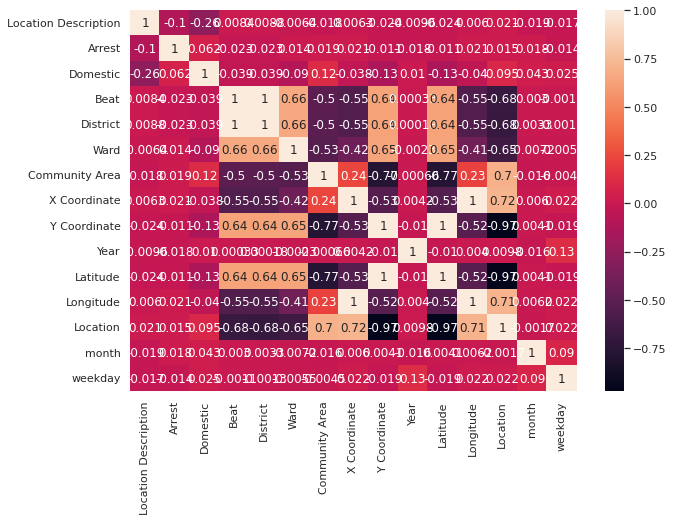

In [193]:
plt.figure(figsize=(10,7))
sns.heatmap(corelation,annot=True)

In [194]:
# month week day have low correlation they isn't effect our results so we drop them
# since beat have high correlation with district so we drop beat
# and X cordinate have high correlation with longitube and Y cordinate with latitude and location so we drop longitude and latitude

selected_cols=['Location Description','Arrest','Domestic','Beat','Ward','Community Area','Year','X Coordinate','Y Coordinate','Location']


In [195]:
cp_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IUCR                  4500 non-null   object 
 1   Primary Type          4500 non-null   object 
 2   Location Description  4500 non-null   int64  
 3   Arrest                4500 non-null   int64  
 4   Domestic              4500 non-null   int64  
 5   Beat                  4500 non-null   float64
 6   District              4500 non-null   float64
 7   Ward                  4500 non-null   float64
 8   Community Area        4500 non-null   float64
 9   FBI Code              4500 non-null   object 
 10  X Coordinate          4500 non-null   float64
 11  Y Coordinate          4500 non-null   float64
 12  Year                  4500 non-null   int64  
 13  Latitude              4500 non-null   float64
 14  Longitude             4500 non-null   float64
 15  Location             

In [196]:
X=cp_crime[selected_cols]
Y=cp_crime['crimeType']

In [197]:
Y=Y.astype(int)
Y.dtype

dtype('int64')

In [198]:
for c in selected_cols:
    print(f'{c}:{len(cp_crime[c].unique())}')


Location Description:85
Arrest:2
Domestic:2
Beat:273
Ward:50
Community Area:77
Year:3
X Coordinate:3881
Y Coordinate:3950
Location:4059


In [199]:
#sns.set_theme(style="whitegrid")
#selected_cols=['Location Description','Arrest','Domestic','Beat','Ward','Community Area','Year','X Coordinate','Y Coordinate','Location']      
#sns.boxplot(x=cp_crime['Location Description'])
#plt.show()
#sns.boxplot(x=cp_crime['Beat'])
#plt.show()
#sns.boxplot(x=cp_crime['Ward'])
#plt.show()
#sns.boxplot(x=cp_crime['Community Area'])
#plt.show()
#sns.boxplot(x=cp_crime['Year'])
#plt.show()
#sns.boxplot(x=cp_crime['Location'])
#plt.show()

In [200]:
#for xg boost

#Y=Y.map({1:0,2:1,3:2,4:3})

In [201]:
# Tarining and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [202]:
X_train.shape

(3600, 10)

In [203]:
y_train.shape

(3600,)

In [204]:
X_test.shape

(900, 10)

In [205]:
X_train.columns

Index(['Location Description', 'Arrest', 'Domestic', 'Beat', 'Ward',
       'Community Area', 'Year', 'X Coordinate', 'Y Coordinate', 'Location'],
      dtype='object')

In [206]:
# Models used
# 1- Logistic Regression
# 2- Naive Bayes
# 3- XG Boost
# 4- Random Forest
# 5- Knn
# 6- SVM
# 7- Ada Boost
# 8- Decision Tree Classifier (J48)

**Logistic Regression**

In [207]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="saga", multi_class='ovr',max_iter=120)
lr.fit(X_train, y_train)
print('Accuracy of Logistic Regression', lr.score(X_test, y_test))

Accuracy of Logistic Regression 0.7377777777777778


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [208]:
y_predict1=lr.predict(X_test)

In [209]:
# Calculate Accuracy Score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracyscore1=accuracy_score(y_predict1,y_test)
print("Accuracy Score is :-",accuracyscore1)

Accuracy Score is :- 0.7377777777777778


In [210]:
print("Classification Report ",classification_report(y_test,y_predict1))

Classification Report                precision    recall  f1-score   support

           0       0.69      0.92      0.79       480
           1       0.85      0.53      0.65       420

    accuracy                           0.74       900
   macro avg       0.77      0.72      0.72       900
weighted avg       0.77      0.74      0.73       900



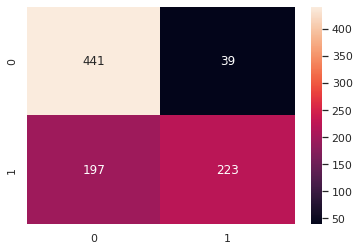

In [211]:
cm=confusion_matrix(y_test,y_predict1)
sns.heatmap(cm,annot=True,fmt='d')

**Decision Tree Classifier**

In [212]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=2)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [213]:
y_predict2=dtc.predict(X_test)

In [214]:
# Calculate Accuracy Score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracyscore2=accuracy_score(y_predict2,y_test)
print("Accuracy Score is :-",accuracyscore2)

Accuracy Score is :- 0.7377777777777778


In [215]:
print("Classification Report ",classification_report(y_test,y_predict2))

Classification Report                precision    recall  f1-score   support

           0       0.68      0.96      0.80       480
           1       0.92      0.48      0.63       420

    accuracy                           0.74       900
   macro avg       0.80      0.72      0.71       900
weighted avg       0.79      0.74      0.72       900



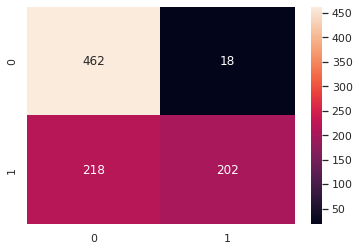

In [216]:
cm=confusion_matrix(y_test,y_predict2)
sns.heatmap(cm,annot=True,fmt='d')

**Random Forest Classifier**

In [217]:
from sklearn.ensemble import RandomForestClassifier 
rfc=RandomForestClassifier(criterion="gini",max_depth=5)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [218]:
y_predict3=rfc.predict(X_test)

In [219]:
# Calculate Accuracy Score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracyscore3=accuracy_score(y_predict3,y_test)
print("Accuracy Score is :-",accuracyscore3)

Accuracy Score is :- 0.7555555555555555


In [220]:
print("Classification Report ",classification_report(y_test,y_predict3))

Classification Report                precision    recall  f1-score   support

           0       0.70      0.95      0.81       480
           1       0.90      0.53      0.67       420

    accuracy                           0.76       900
   macro avg       0.80      0.74      0.74       900
weighted avg       0.79      0.76      0.74       900



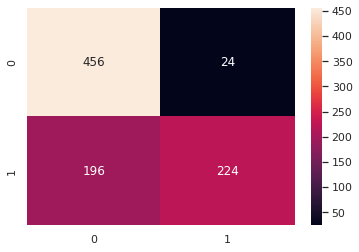

In [221]:
cm=confusion_matrix(y_test,y_predict3)
sns.heatmap(cm,annot=True,fmt='d')

**Naive Bayes Classifier**

In [222]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print('Accuracy of Naive Bayes', gnb.score(X_test, y_test))

Accuracy of Naive Bayes 0.7388888888888889


In [223]:
y_predict4=gnb.predict(X_test)

In [224]:
# Calculate Accuracy Score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracyscore4=accuracy_score(y_predict4,y_test)
print("Accuracy Score is :-",accuracyscore4)

Accuracy Score is :- 0.7388888888888889


In [225]:
print("Classification Report ",classification_report(y_test,y_predict4))

Classification Report                precision    recall  f1-score   support

           0       0.70      0.88      0.78       480
           1       0.81      0.58      0.67       420

    accuracy                           0.74       900
   macro avg       0.76      0.73      0.73       900
weighted avg       0.75      0.74      0.73       900



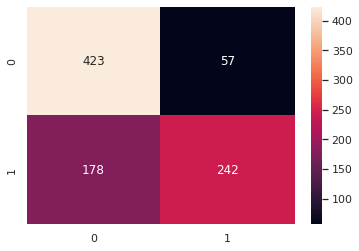

In [226]:
cm=confusion_matrix(y_test,y_predict4)
sns.heatmap(cm,annot=True,fmt='d')

**K-Nearest Neighbor Classifier**

In [227]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print('Accuracy of KNN', knn.score(X_test, y_test))
pred_train = knn.predict(X_train)
pred_i = knn.predict(X_test)
print('Test accuracy ', metrics.accuracy_score(y_train, pred_train))
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))

Accuracy of KNN 0.7166666666666667
Test accuracy  0.7555555555555555
Accuracy  0.7166666666666667


In [228]:
# Calculate Accuracy Score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracyscore5=accuracy_score(pred_i,y_test)
print("Accuracy Score is :-",accuracyscore5)

Accuracy Score is :- 0.7166666666666667


**Support Vector Classifier**

In [229]:
# SVM

from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
print('Accuracy of SVM', svm.score(X_test, y_test))

Accuracy of SVM 0.72


In [230]:
y_predict6=svm.predict(X_test)

In [231]:
# Calculate Accuracy Score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracyscore6=accuracy_score(y_predict6,y_test)
print("Accuracy Score is :-",accuracyscore6)

Accuracy Score is :- 0.72


**Ada Boost Classifier**

In [232]:
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
adb = AdaBoostClassifier(n_estimators=300,  learning_rate=1)
# Train Adaboost Classifer
model = adb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7966666666666666


In [233]:
# Calculate Accuracy Score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracyscore7=accuracy_score(y_pred,y_test)
print("Accuracy Score is :-",accuracyscore7)

Accuracy Score is :- 0.7966666666666666


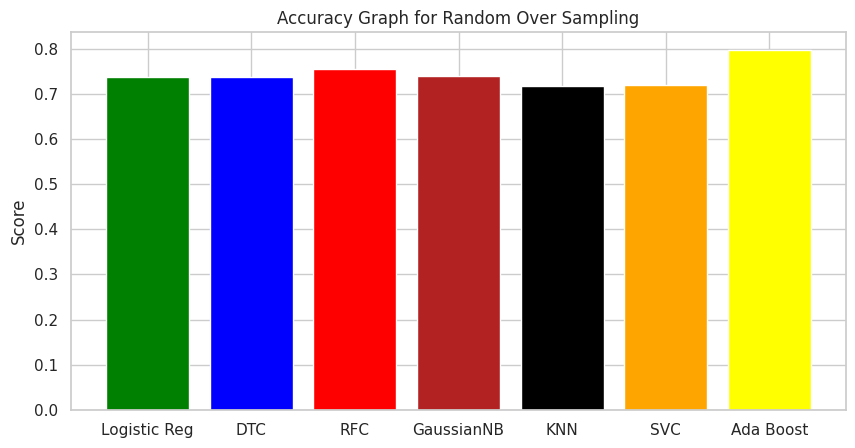

In [234]:
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})

A = ['Logistic Reg','DTC','RFC','GaussianNB','KNN','SVC','Ada Boost']
B=[]
B.append(accuracyscore1)
B.append(accuracyscore2)
B.append(accuracyscore3)
B.append(accuracyscore4)
B.append(accuracyscore5)
B.append(accuracyscore6)
B.append(accuracyscore7)
# B = [f'{yi:.2f}' for yi in B]

# #bar plot

plt.bar(A,B,color=['green', 'blue', 'red','firebrick','black','orange','yellow'])
# for x,y in zip(A,B):
#   plt.text(x,y,str(y))
# # #add title '{yi:.2f}f'{yi:.2f}'
plt.title('Accuracy Graph for Random Over Sampling')

# #add x and y labels
# plt.xlabel('Model')
plt.ylabel('Score')
plt.savefig("Accuracy_graph_ROS.png")
# #show plot
plt.show()

**Using Cross Validation**

In [235]:
# Using Cross Validation
# Models used
# 1- Logistic Regression
# 2- Naive Bayes
# 3- Random Forest
# 4- Knn
# 5- SVM
# 6- Ada Boost
# 7- Decision Tree Classifier

In [236]:
# Logistic Regression

from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,X_train, y_train,cv=10)
score
print('Logistic Regression boost Using Cross Validation: ',score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

Logistic Regression boost Using Cross Validation:  0.7625


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [237]:
# Naive Bayes

from sklearn.model_selection import cross_val_score
score=cross_val_score(gnb,X_train, y_train,cv=10)
score
print('Naive Bayes Using Cross Validation: ',score.mean())

Naive Bayes Using Cross Validation:  0.7538888888888888


In [238]:
# KNN

from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,X_train, y_train,cv=10)
score
print('KNN Using Cross Validation: ',score.mean())

KNN Using Cross Validation:  0.6958333333333334


In [239]:
# Random Forest

from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X_train, y_train,cv=10)
score
print('Random Forest Using Cross Validation: ',score.mean())

Random Forest Using Cross Validation:  0.7805555555555557


In [240]:
# SVM

from sklearn.model_selection import cross_val_score
score=cross_val_score(svm,X_train, y_train,cv=10)
score
print('Random Forest Using Cross Validation: ',score.mean())

Random Forest Using Cross Validation:  0.7091666666666666


In [241]:
# Decision Tree

from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,X_train, y_train,cv=10)
score
print('Decision Using Cross Validation: ',score.mean())

Decision Using Cross Validation:  0.7488888888888889


In [242]:
# Ada Boost

from sklearn.model_selection import cross_val_score
score=cross_val_score(adb,X_train, y_train,cv=10)
score
print('Ada BoostUsing Cross Validation: ',score.mean())

Ada BoostUsing Cross Validation:  0.8036111111111112


**Prediction Using Best Model - AdaBoostClassifier**

In [243]:

# Features -  Location Description,Arrest,Domestic,Beat,Ward,Community Area,Year,X Coordinate,Y Coordinate,Location

In [244]:
model.predict([[71,0,0,0.2533,17,67,2015,0.6409,0.3389,0.0658]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [245]:
model.predict([[75,0,0,0.051155,5,41,0,0.814395,0.392357,0.080947]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [ ]:
model.predict([[75,1,1,0.127888,7,43,0,0.902400,0.290414,0.130165]])